import numpy as np
import matplotlib.pyplot as plt

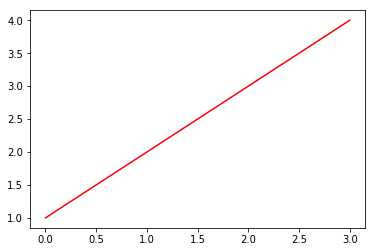

In [4]:
x = np.linspace(0,3,4)  # xの値域(0, 1, 2, 3)
y = x + 1               # 直線の式
plt.plot(x,y,"r-")      # 直線を引く
plt.show()   

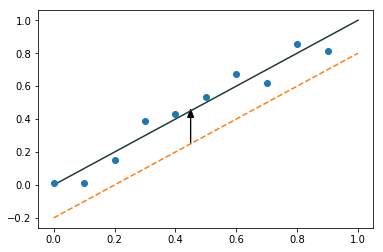

In [67]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1)  # xの値域(0, 1, 2, 3)
y = x               # 直線の式
plt.plot(x,y,"#23373b")      # 直線を引く
z = (np.random.rand(1,10)[0] - 0.5) * 0.2
plt.plot(np.arange(0,1,0.1), z+np.arange(0,1,0.1), 'o')
w = x - 0.2
plt.plot(x, w, "--")
ax = plt.axes()
ax.arrow(0.45, 0.25, 0, 0.16, head_width=0.02, head_length=0.05, fc='k', ec='k')
plt.savefig('arrange_params.eps')
plt.show()   
